# **CVDL Practical No: 11**

> By TYAIMLA71 - Chetan Indulkar




### **Problem Statement:**  Time series prediction using RNN – stock market analysis or weather forecasting.



## Import Libraries to be used:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset



In [ ]:
testdata = '/content/testset.csv'
traindata = '/content/trainset.csv'

In [ ]:
train_data = pd.read_csv(traindata)
test_data = pd.read_csv(testdata)

## Retrieving data from dataset

In [ ]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


## Data Preprocessing

In [ ]:
train_data = train_data.iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2013-01-02,357.385559
1,2013-01-03,360.122742
2,2013-01-04,362.313507
3,2013-01-07,365.348755
4,2013-01-08,365.393463
...,...,...
1254,2017-12-22,1061.109985
1255,2017-12-26,1058.069946
1256,2017-12-27,1057.390015
1257,2017-12-28,1051.599976


In [ ]:
test_data = test_data.iloc[:,:2]
test_data['Date'] = pd.to_datetime(test_data['Date'])  # converting to date time object
test_data

,Date,Open
0,2018-01-02,1048.339966
1,2018-01-03,1064.310059
2,2018-01-04,1088.000000
3,2018-01-05,1094.000000
4,2018-01-08,1102.229980
...,...,...
120,2018-06-25,1143.599976
121,2018-06-26,1128.000000
122,2018-06-27,1121.339966
123,2018-06-28,1102.089966


In [ ]:
dataset_trainm = train_data.Open.values
dataset_train = np.reshape(dataset_trainm, (-1,1))
dataset_train.shape

(1259, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1259, 1)

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, 1259):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1209, 50, 1)
Shape of y_train after reshape : (1209, 1)


## Model creating and Training Model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 7s 84ms/step - loss: 0.3110 - accuracy: 8.2713e-04
Epoch 2/50
38/38 [==============================] - 2s 48ms/step - loss: 0.1903 - accuracy: 8.2713e-04
Epoch 3/50
38/38 [==============================] - 2s 45ms/step - loss: 0.1442 - accuracy: 8.2713e-04
Epoch 4/50
38/38 [==============================] - 2s 45ms/step - loss: 0.1120 - accuracy: 8.2713e-04
Epoch 5/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0825 - accuracy: 8.2713e-04
Epoch 6/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0677 - accuracy: 8.2713e-04
Epoch 7/50
38/38 [==============================] - 2s 51ms/step - loss: 0.0543 - accuracy: 8.2713e-04
Epoch 8/50
38/38 [==============================] - 3s 85ms/step - loss: 0.0452 - accuracy: 8.2713e-04
Epoch 9/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0433 - accuracy: 8.2713e-04
Epoch 10/50
38/38 [==============================] - 2s 45ms/step - loss:

In [ ]:
# Losses
history.history["loss"]

[0.3109760284423828,
 0.19030144810676575,
 0.1441565901041031,
 0.11204665154218674,
 0.08254265040159225,
 0.06773623824119568,
 0.05427319183945656,
 0.04519142955541611,
 0.04327768087387085,
 0.03144211322069168,
 0.028743399307131767,
 0.025331487879157066,
 0.026284031569957733,
 0.020565195009112358,
 0.019050663337111473,
 0.018015332520008087,
 0.01596655696630478,
 0.015413683839142323,
 0.013937385752797127,
 0.013145686127245426,
 0.0116959223523736,
 0.01085091196000576,
 0.009497532621026039,
 0.008748775348067284,
 0.008561990223824978,
 0.008651616983115673,
 0.007645661476999521,
 0.00785808265209198,
 0.007642891723662615,
 0.00703332107514143,
 0.006075373385101557,
 0.00561505276709795,
 0.0052387043833732605,
 0.005328198429197073,
 0.005434525199234486,
 0.004730211105197668,
 0.00464783888310194,
 0.004691713023930788,
 0.004488688427954912,
 0.004321788437664509,
 0.0044909208081662655,
 0.0043601710349321365,
 0.0038338503800332546,
 0.004128676373511553,
 0.0

## Plotting the dataset result

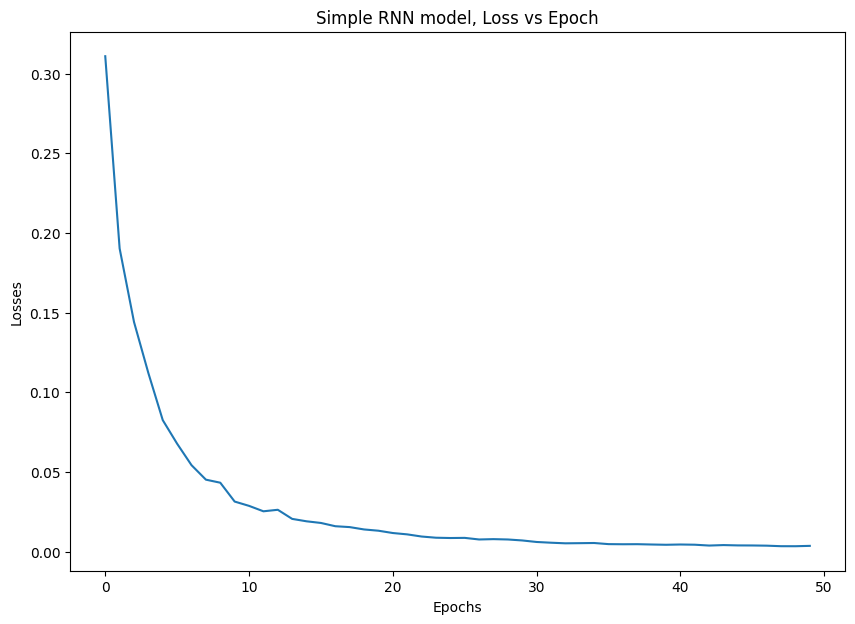

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

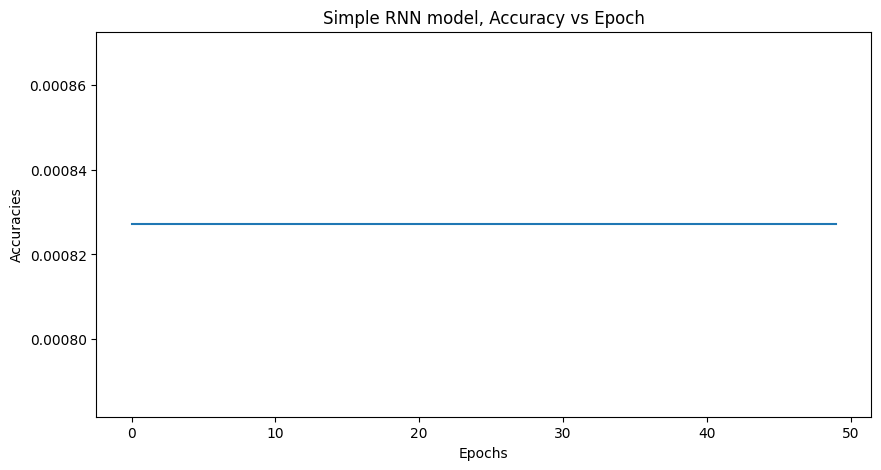

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

38/38 [==============================] - 1s 20ms/step


(1209, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1209, 1)

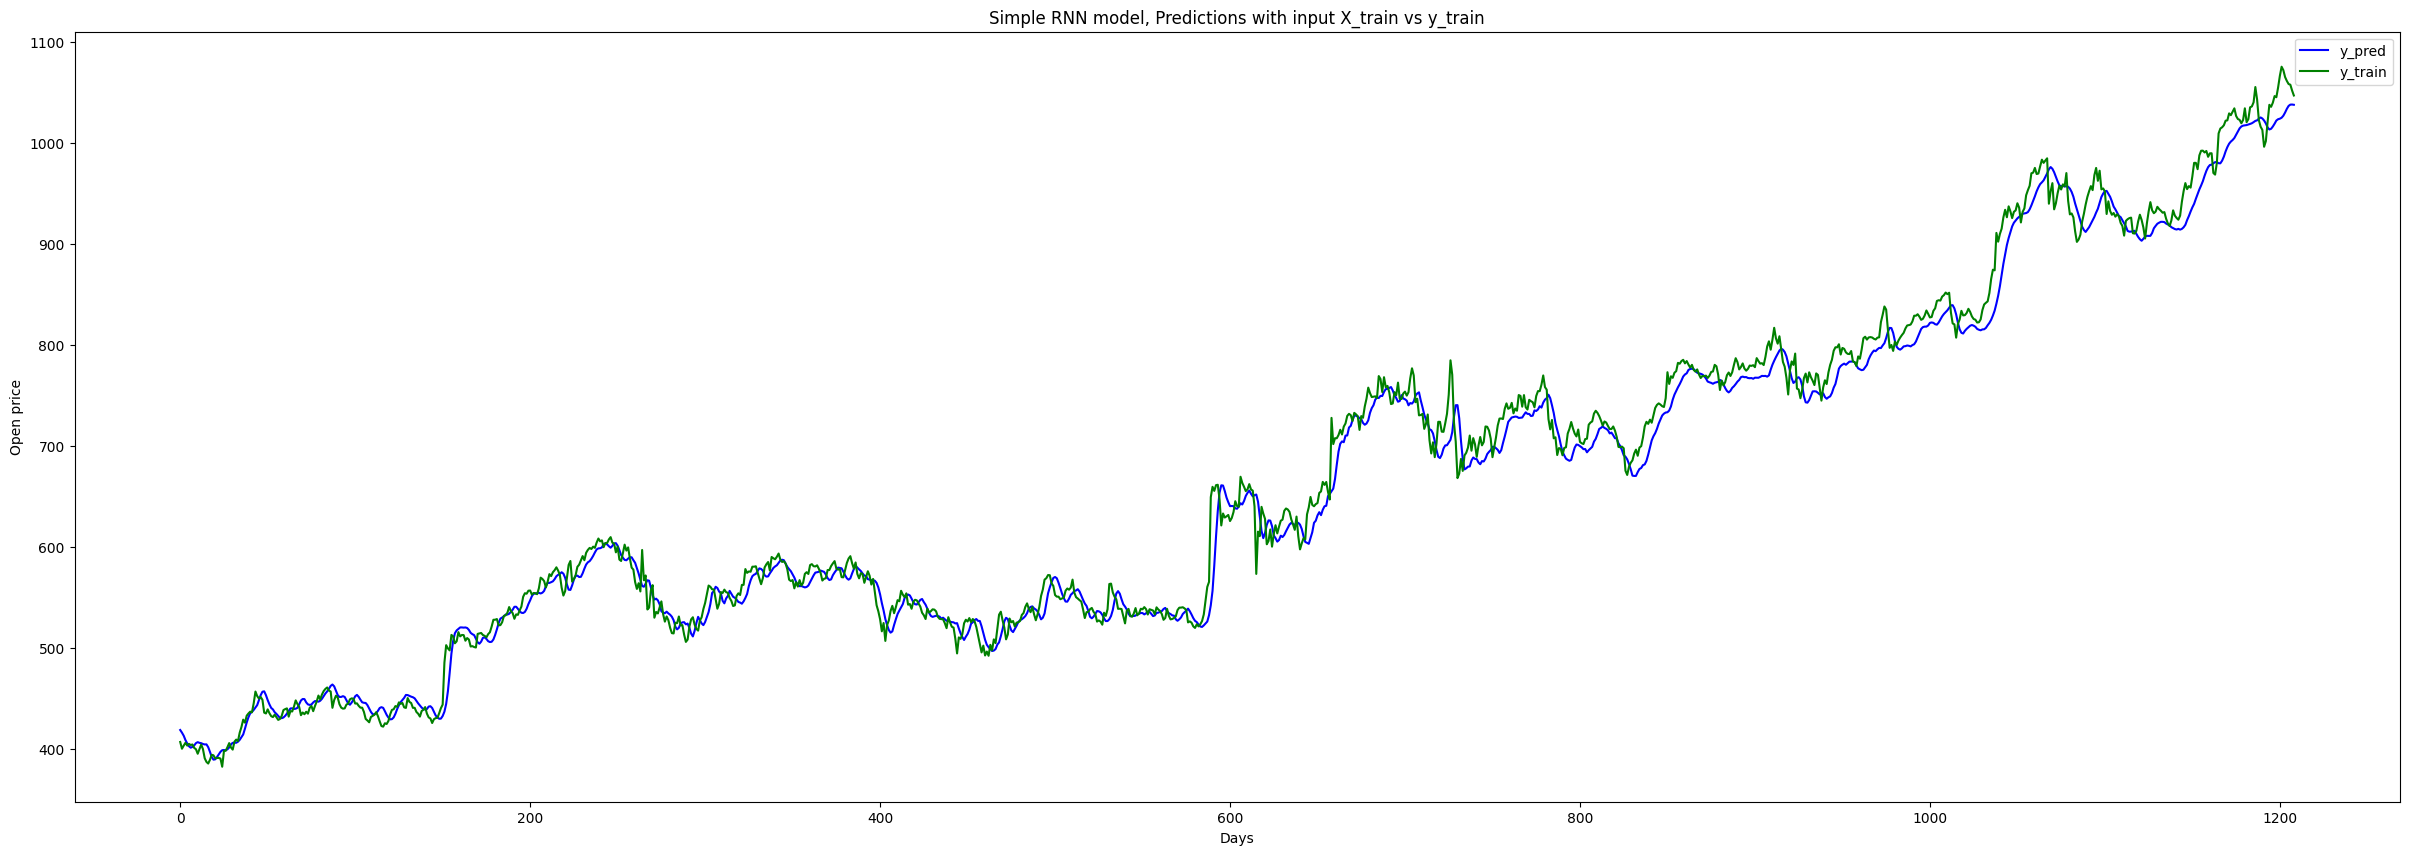

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()
